In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from IPython.display import display

import sys
sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

% matplotlib inline

# Load data and preprocess the data

In [2]:
df = pd.read_csv('06 Aggregated dR RT Streptavidin length 8 and 9.csv')
print len(df)

df = df[np.isfinite(df['Ka Final Upper'])]
print len(df)

df = df[df['Ka Final Lower'] > 0] 
print len(df)

334
325
187


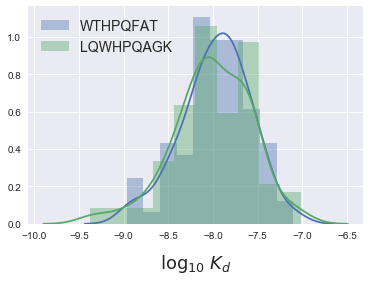

In [3]:
sns.distplot(np.log10(df[ df['Peptide Length'] == 8]['Kd Best']), label = 'WTHPQFAT')
sns.distplot(np.log10(df[ df['Peptide Length'] == 9]['Kd Best']), label = 'LQWHPQAGK')
plt.xlabel('$\log_{10}{\ K_d}$', labelpad = 12, fontsize = 18)
plt.legend(fontsize = 14, loc = 2)

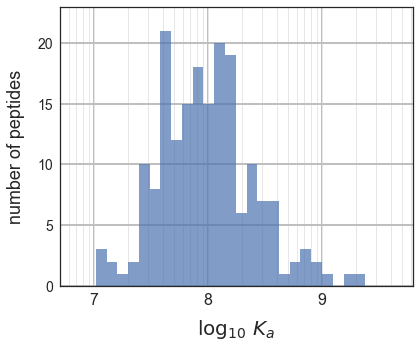

In [10]:
sns.set(style = 'white')

plt.figure(figsize = (6, 5))
ax = sns.distplot(np.log10(df['Ka Final']), kde = False, bins = 25, hist_kws = {'alpha' : 0.7})

ticks = range(1, 10)
power = [10**p for p in range(5, 11)]
minor_ticks = np.log10([x*y for x in power for y in ticks])
major_ticks = range(5, 11)

plt.xlabel('$\log_{10}{\ K_a}$', labelpad = 10, fontsize = 20)
plt.ylabel('number of peptides', labelpad = 12, fontsize = 18)

ax.set_xticks(minor_ticks, minor = True)
ax.set_xticks(major_ticks, minor = False)

ax.grid(b = True, which = 'major', color = '0.75', linewidth = 2)
ax.grid(b = True, which = 'minor', color = '0.9', linewidth = 1)

plt.tick_params(axis = 'x', which = 'major', labelsize = 16)
plt.tick_params(axis = 'y', which = 'major', labelsize = 14)

plt.xlim((6.7, 9.8))
plt.ylim((0, 23))

plt.tight_layout()
plt.savefig('Ka distribution for 8- and 9-peptides.png')